# Statement

The author is a member of Group 15.
Group 15's analyses on Workspace Dataset would like to take different perspectives:
- the office perspective
- the employee's perspective
- the boss's perspective
- the perspective of a bystander

We do this in order to identify and analyse problems from more perspectives (rather than being restricted by a given dataset), so that we can provide better support for subsequent design and strategy deployment.

###### The author has been given the opportunity to analyse from OFFICE perspective.

# Objective Defining

### Understanding Patterns in Office Space Usage

- Time of Use (Peak days/ months of office space usage)
- Frequency of Use (How often a particular office is used and compare it with others)
- Type of Use (the AW type which different office used for)
- User Preference (When and Where do employees prefer to work)
- Space Utilization (Office seat usage）

### Identifying Potential Problems in Office Space Usage

- Mismatch of Space and Need (eg. Some spaces are underused while others are overused/ Employees in a certain office prefer working from home or working in the office)
- Lack of human considerations (eg. Is it possible that it is because of office problems, such as the office environment, but employees are not willing to book an office?)
- Booking Conflicts (Booking systems frequently bug)

# Situation Assessment

- This data comes from a real estate company with a complex structure and a large number of people.
- The data in the table is mostly about the geographical information and booking system information of the company's offices and workspaces, as well as the organizational information of the company's employees.   Analysis and explorable questions about this data may be to observe employees' scheduled behaviors and preferences, upgrade office and workspace systems, and develop adaptive organizational structures and plans to adapt to employee behaviors and habits to achieve better job satisfaction degree and company performance.
- However, due to the lack of description of the type of office space (such as whether it is close to equipment rooms or hidden), the contribution of this data to insights into employee behavior is limited.

# Data Descriptions:

To describe the data, something that could be explored are how these variables interact and what they represent. Aspects that could be begun with are:
- The relation among sheets of Registry, Registry Booking, and Booking.
- How do Cites match with Offices?
- On what days will the office be booked?
- The relation between Available Seats & Total Seats.
- What is the situation of AW like? 

### The specific process is as follows：

Before starting, import the packages that I may be using later:

In [1]:
import pandas as pd

Read the data from our given Data Fair

In [2]:
# There are 4 sheets in the database excel form

data_R = pd.read_excel('DSfD_workplace database.xlsx',sheet_name = '00_Registry')
data_RB = pd.read_excel('DSfD_workplace database.xlsx',sheet_name = '00_RegistryBookings')
data_O = pd.read_excel('DSfD_workplace database.xlsx',sheet_name = '00_Offices')
data_B = pd.read_excel('DSfD_workplace database.xlsx',sheet_name = '00_Bookings')

# print the first 5 rows of each sheet. 

print(data_R.head())
print(data_RB.head())
print(data_O.head())
print(data_B.head())

    User ID       City Department (First level) Organizational Unit  \
0  FL60979L  Edinburgh                       NW            BX69X9X9   
1  F00000M3  Edinburgh                       NW            BX8X59X7   
2  F00000T0  Edinburgh                       NW            BX576680   
3  F00000T6  Edinburgh                       CE            BX830898   
4  F0M05L90  Edinburgh                       CE            C0000385   

  Classification      Role    Office Sex  
0       Employee  Employee  SCO85884   M  
1       Employee  Employee  SCO85883   M  
2       Employee  Employee  SCO84989   M  
3    Mid-manager  Employee  SCO85837   M  
4       Employee  Employee  SCO85883   F  
    User ID AW Adhesion      AW Code    Office       City  \
0  FL60979L         Yes  Daily Agile  SCO85884  Edinburgh   
1  F00000M3         Yes  Daily Agile  SCO85883  Edinburgh   
2  F0M05L90         Yes  Daily Agile  SCO85883  Edinburgh   
3  FL69302L          No          NaN  ENG39394     London   
4  FL6L620

1. The relation among sheets of Registry, Registry Booking, and Booking.

It can be found that the forms of Registry, Registry Booking, and Booking all have User IDs, so the relationship between the three forms can be inferred by comparing their columns of User ID.

In [3]:
# Get 'User ID' series from each dataframe
user_ids_R = data_R['User ID']
user_ids_RB = data_RB['User ID']
user_ids_B = data_B['User ID']

# Find common 'User ID's between the dataframes
common_ids = pd.Series(list(set(user_ids_R).intersection(set(user_ids_RB), set(user_ids_B))))

print("Number of common 'User ID's between data_R, data_RB, and data_B: ", len(common_ids))

# Get total 'User ID' counts for each dataframe
total_ids_R = len(user_ids_R)
total_ids_RB = len(user_ids_RB)
total_ids_B = len(user_ids_B)

print("Total 'User ID's in data_R: ", total_ids_R)
print("Total 'User ID's in data_RB: ", total_ids_RB)
print("Total 'User ID's in data_B: ", total_ids_B)

Number of common 'User ID's between data_R, data_RB, and data_B:  8158
Total 'User ID's in data_R:  15878
Total 'User ID's in data_RB:  13013
Total 'User ID's in data_B:  199721


Thus
- A total of 8,158 employees have registered with the company's system and the booking system, and have booked seats.
- 15,878 employees have registered for the company's system, 13,013 people have registered for the booking system, but 199721 people have booked seats.

2. How do Cites match with Offices?

Create a list of all sheets and their names

In [4]:
# Create a list of all sheets and their names
df_names = [(data_R, 'data_R'), (data_RB, 'data_RB'), (data_O, 'data_O'), (data_B, 'data_B')]

Check the unique value and counts of Cities and Offices in each sheet

In [5]:
# Define a function to check a column in a df_names
def check_column(df, name, column):
    if column in df.columns:  # Check if the column exists in the df_names
        # Get data type of the column
        dtype = df[column].dtype
        print(f"In {name}, the data type of '{column}' is {dtype}")

        # Get counts of each unique value in the column
        value_counts = df[column].value_counts()
        print(f"In {name}, '{column}' has the following counts of unique values:\n{value_counts}")
    else:
        print(f"{name} does not have a '{column}' column")

for df, name in df_names:
    # Check 'City' column
    check_column(df, name, 'City')

    # Check 'Office' column
    check_column(df, name, 'Office')

In data_R, the data type of 'City' is object
In data_R, 'City' has the following counts of unique values:
Edinburgh    10535
Dublin        3189
London        2154
Name: City, dtype: int64
In data_R, the data type of 'Office' is object
In data_R, 'Office' has the following counts of unique values:
SCO85883    2120
SCO33334    1450
SCO33388    1301
SCO33389    1274
IRE84759    1198
            ... 
SCO85339       2
SCO84963       2
IRE84583       2
SCO85839       2
ENG39398       1
Name: Office, Length: 84, dtype: int64
In data_RB, the data type of 'City' is object
In data_RB, 'City' has the following counts of unique values:
Edinburgh    8577
Dublin       2433
London       2003
Name: City, dtype: int64
In data_RB, the data type of 'Office' is object
In data_RB, 'Office' has the following counts of unique values:
SCO85883    2118
SCO33334    1461
SCO33388    1296
SCO33389    1269
IRE84759    1191
IRE33986     921
ENG38999     813
SCO85884     713
ENG39384     623
SCO33336     620
ENG3939

Thus
- The company should have offices in Edinburgh, Dublin, London, and the largest amount of offices in Edinburgh, which is likely to be the company's headquarters.
- The naming of the office seems to be in the format of district + number
- There seems to be a one-to-one correspondence between the city and the office name prefix
- ROMA appears in the 00_Booking, which looks a little strange

I wonder if the naming of the office is in the format of district + number, and whether they have correspondence with each other. 

In [6]:
for df, name in df_names:
    # Check if 'City' and 'Office' columns exist in the df_names
    if 'City' in df.columns and 'Office' in df.columns:
        # Get unique values in 'City' column
        unique_cities = df['City'].unique()

        for city in unique_cities:
            # Extract rows with the current 'City' value
            city_rows = df.loc[df['City'] == city]

            # Get unique values of the first three characters of the 'Office' column in these rows
            office_3_chars_unique = city_rows['Office'].str[:3].unique()

            print(f"In {name}, for 'City' value '{city}', the unique values of the first three characters of 'Office' are:\n{office_3_chars_unique}")
    else:
        print(f"{name} does not have 'City' and 'Office' columns")

In data_R, for 'City' value 'Edinburgh', the unique values of the first three characters of 'Office' are:
['SCO']
In data_R, for 'City' value 'London', the unique values of the first three characters of 'Office' are:
['ENG']
In data_R, for 'City' value 'Dublin', the unique values of the first three characters of 'Office' are:
['IRE']
In data_RB, for 'City' value 'Edinburgh', the unique values of the first three characters of 'Office' are:
['SCO']
In data_RB, for 'City' value 'London', the unique values of the first three characters of 'Office' are:
['ENG']
In data_RB, for 'City' value 'Dublin', the unique values of the first three characters of 'Office' are:
['IRE']
data_O does not have 'City' and 'Office' columns
In data_B, for 'City' value 'London', the unique values of the first three characters of 'Office' are:
['ENG']
In data_B, for 'City' value 'Edinburgh', the unique values of the first three characters of 'Office' are:
['SCO']
In data_B, for 'City' value 'Dublin', the unique va

Thus
- City corresponds to the Office prefix: Edinburgh-SCO; London-ENG; Dublin-IRE. 
- In 00_Booking, 6440 lines of ROMA-SCO also appeared, which looks very strange. 

3. On what days will the office be booked?

Convert the date information in the booking to the day of the week, so that it is easier to understand what the booking days represent.

In [7]:
# Convert 'Date' column to datetime
data_B['Date'] = pd.to_datetime(data_B['Date'], format='%Y/%m/%d')

# Create a new column 'Day_of_Week' with the day of the week
# The day of the week with Monday=0, Sunday=6
data_B['Day_of_Week'] = data_B['Date'].dt.dayofweek

# Map the 'Day_of_Week' column to the actual day names
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data_B['Day_of_Week'] = data_B['Day_of_Week'].map(days)

print(data_B)

         User ID       Date AW Type Other    Office  Total seats   Country  \
0       D02M77M0 2023-02-06   Other   Cde  ENG38999          NaN   England   
1       D02M77M0 2023-02-07  Office   NaN  ENG38999         61.0   England   
2       D02M77M0 2023-02-08  Remote   NaN  ENG38999          NaN   England   
3       D02M77M0 2023-02-09  Office   NaN  ENG38999         61.0   England   
4       D02M77M0 2023-02-10   Other   Cde  ENG38999          NaN   England   
...          ...        ...     ...   ...       ...          ...       ...   
199716  F7L0M039 2023-10-02   Other   Cde  SCO85883          NaN  Scotland   
199717  F7L0M039 2023-10-03  Remote   NaN  SCO85883          NaN  Scotland   
199718  F7L0M039 2023-10-04  Office   NaN  SCO85883         95.0  Scotland   
199719  F7L0M039 2023-10-05  Office   NaN  SCO85883         95.0  Scotland   
199720  F7L0M039 2023-10-06  Remote   NaN  SCO85883          NaN  Scotland   

             City Structure Day_of_Week  
0          London    

Ignoring other factors, I want to see which day appears most in the booking system.

In [8]:
#Extract the 'Day_of_Week' column
day_of_week = data_B['Day_of_Week']

# Use value_counts to get all values and the number of values
DoW_counts = day_of_week.value_counts()

print(DoW_counts)

Friday       40481
Thursday     40149
Wednesday    39987
Tuesday      39740
Monday       39364
Name: Day_of_Week, dtype: int64


Ignoring other factors such as geographical factors, in the booking system, Thursday and Friday appear the most frequently in the scheduled time information.

4. The relation between Available Seats & Total Seats.

In [9]:
# Get 'Office' series from each sheet
office_O = data_O['Office']
office_B = data_B['Office']

# Find common 'Office' values between the two sheets
common_offices = pd.Series(list(set(office_O).intersection(set(office_B))))

# Count these common values in each sheet
common_counts_O = office_O[office_O.isin(common_offices)].value_counts()
common_counts_B = office_B[office_B.isin(common_offices)].value_counts()

print("Counts of common 'Office' values in data_O: ", common_counts_O)
print("Counts of common 'Office' values in data_B: ", common_counts_B)

# Extract rows with common 'Office' values from each sheet
common_rows_O = data_O[data_O['Office'].isin(common_offices)]
common_rows_B = data_B[data_B['Office'].isin(common_offices)]

print("Rows in data_O with common 'Office' values:\n", common_rows_O)
print("Rows in data_B with common 'Office' values:\n", common_rows_B)

Counts of common 'Office' values in data_O:  SCO33336    106
SCO85883    105
SCO33334     92
ENG38999     76
IRE84794     67
SCO33389     53
IRE33986     50
ENG39394     38
SCO85884     33
ENG39384     30
IRE84759     25
SCO33388     20
SCO85399     18
SCO85888     16
SCO85835     14
SCO85393     11
SCO85395      4
Name: Office, dtype: int64
Counts of common 'Office' values in data_B:  SCO85883    37481
SCO33334    29741
ENG38999    18469
SCO33389    18273
SCO33388    18176
IRE33986    14326
IRE84759    11603
SCO85884    10739
SCO33336    10391
ENG39384     7562
SCO85835     5172
ENG39394     4012
SCO85399     3507
SCO85888     3195
SCO85393     3159
IRE84794     2635
SCO85395     1280
Name: Office, dtype: int64
Rows in data_O with common 'Office' values:
        Office Department (First level + Second level)  Available seats
0    SCO33334                                    CC.G               85
1    SCO33334                                    CC.M              166
2    SCO33334       

Comparing two dataframe, as well as data provider's instruction, it seems that Total Seats is the number of seats left after someone has reserved a seat.

5. What is the situation of AW like?

In [10]:
# Count 'Yes' and 'No' values in 'AW Adheasion' column
aw_adhesion_counts = data_RB['AW Adhesion'].value_counts()

print("Counts of 'Yes' and 'No' values in 'AW Adhesion' column:\n", aw_adhesion_counts)

# Among the 'Yes' values, count values in 'AW Code' column
aw_code_counts = data_RB.loc[data_RB['AW Adhesion'] == 'Yes', 'AW Code'].value_counts()

print("Among the 'Yes' values in 'AW Adhesion' column, counts of 'Daily Agile' and 'Weekly Agile' values in 'AW Code' column:\n", aw_code_counts)

Counts of 'Yes' and 'No' values in 'AW Adhesion' column:
 Yes    11964
No      1049
Name: AW Adhesion, dtype: int64
Among the 'Yes' values in 'AW Adhesion' column, counts of 'Daily Agile' and 'Weekly Agile' values in 'AW Code' column:
 Daily Agile     9109
Weekly Agile    2828
Full Remote       25
Name: AW Code, dtype: int64


Thus
- Among people who have registerd the booking system, there are 11964 people prefer Agile Work, while 1049 people don't. 
- Among people who prefer Agile Work, there are 9109 people prefer Daily Agile, 2828 people prefer Weekly Agile, and 25 people prefer Full Remote. 

According to Objectives above, and based on Data Understanding,some preparation work could be done for the later Hypotheses. 

# Data Preparation:

### Cleaning

1. ROMA-SCO is strange, identify what happened. 

In [11]:
# In data_B, find rows where City is 'ROMA'
data_B_ROMA = data_B.loc[data_B['City'] == 'ROMA']

# Count the values and their frequency in 'User ID' in these rows
user_id_counts = data_B_ROMA['User ID'].value_counts()

# Extract 'User ID' from data_RB
data_RB_user_ids = data_RB['User ID']

# Compare these 'User ID' with 'User ID' in data_B and find common values
common_user_ids = data_RB_user_ids[data_RB_user_ids.isin(data_B_ROMA['User ID'])]

# In data_RB, extract rows where 'User ID' is the same as in data_B
common_rows = data_RB[data_RB['User ID'].isin(common_user_ids)]

# In these rows, retrieve the corresponding 'City' values
city_values = common_rows['City']

# Examine whether there is only Edinburgh in city_values
ct_city_values = city_values.unique()

print(ct_city_values)

['Edinburgh']


Thus
- Same people in booking system and having booking behavior should in same city.
- ROMA is a fault, it should be replaced by Edinburgh.

Replace all the ROMA by Edinburgh

In [12]:
# In data_B, replace 'ROMA' with 'Edinburgh' in the column of City
data_B['City'] = data_B['City'].replace('ROMA', 'Edinburgh')

Now bugs in cities have been corrected

2. Examine whether the value of the following column is empty：
- 'User ID' in data_B and data_RB
- 'Office' in data_B, data_O, and data_RB
- 'Available seats' in data_O

In [13]:
# In data_B, keep rows where 'User Id' is not empty
data_B = data_B.loc[data_B['User ID'].notna()]

# In data_RB, keep rows where 'User Id' is not empty
data_RB = data_RB.loc[data_RB['User ID'].notna()]

# In data_B, keep rows where 'Office' is not empty
data_B = data_B.loc[data_B['Office'].notna()]

# In data_O, keep rows where 'Office' is not empty
data_O = data_O.loc[data_O['Office'].notna()]

# In data_RB, keep rows where 'Office' is not empty
data_RB = data_RB.loc[data_RB['Office'].notna()]

# If the values in the 'Available seats' column in data_O are strings, change them all to int type.
data_O['Available seats'] = data_O['Available seats'].apply(lambda x: int(x) if isinstance(x, str) else x)

# In data_O, keep rows where 'Available seats' is not empty
data_O = data_O.loc[data_O['Available seats'].notna() & data_O['Available seats'] >0 ]

# Calculate 3 sheets' amounts of row. 
l_data_B = len(data_B)
l_data_O = len(data_O)
l_data_RB = len(data_RB)

print(l_data_B)
print(l_data_O)
print(l_data_RB)

199721
452
13013


Now it can be confirmed that values of certain columns are not empty and digital values become int. 

3. In this database, the meaning of 'Structure' is similar to 'Department', as it is known, according to the instructions of Data Provider. For consistency across sheets, replace the name of the column of 'Structure' by 'Department'. 

In [14]:
# Rename the 'Structure' column to 'Department' in data_B
data_B.rename(columns={'Structure': 'Department'}, inplace=True)

print(data_B)

         User ID       Date AW Type Other    Office  Total seats   Country  \
0       D02M77M0 2023-02-06   Other   Cde  ENG38999          NaN   England   
1       D02M77M0 2023-02-07  Office   NaN  ENG38999         61.0   England   
2       D02M77M0 2023-02-08  Remote   NaN  ENG38999          NaN   England   
3       D02M77M0 2023-02-09  Office   NaN  ENG38999         61.0   England   
4       D02M77M0 2023-02-10   Other   Cde  ENG38999          NaN   England   
...          ...        ...     ...   ...       ...          ...       ...   
199716  F7L0M039 2023-10-02   Other   Cde  SCO85883          NaN  Scotland   
199717  F7L0M039 2023-10-03  Remote   NaN  SCO85883          NaN  Scotland   
199718  F7L0M039 2023-10-04  Office   NaN  SCO85883         95.0  Scotland   
199719  F7L0M039 2023-10-05  Office   NaN  SCO85883         95.0  Scotland   
199720  F7L0M039 2023-10-06  Remote   NaN  SCO85883          NaN  Scotland   

             City Department Day_of_Week  
0          London   

Now, Column names with the same meaning are consistent.

### Asserting

In order to check whether the data has been cleaned, I would like to assert:
- Whether there is no ROMA in the City column of data_B; 
- Whether the value of the following column is empty: 'User ID' in data_B and data_RB, 'Office' in data_B, data_O, and data_RB, 'Available seats' in data_O; 
- Whether there is no column named 'Structure' and there is a column named 'Department' in data_B 

In [15]:
# Check if 'ROMA' no longer exists in the 'City' column of data_B
assert 'ROMA' not in data_B['City'].values, "ROMA still exists in the 'City' column of data_B"

# Check if the 'User ID' column in data_B and data_RB is not empty
assert data_B['User ID'].notna().all(), "'User ID' column in data_B contains empty values"
assert data_RB['User ID'].notna().all(), "'User ID' column in data_RB contains empty values"

# Check if the 'Office' column in data_B, data_O, and data_RB is not empty
assert data_B['Office'].notna().all(), "'Office' column in data_B contains empty values"
assert data_O['Office'].notna().all(), "'Office' column in data_O contains empty values"
assert data_RB['Office'].notna().all(), "'Office' column in data_RB contains empty values"

# Check if the 'Available seats' column in data_O is not empty
assert data_O['Available seats'].notna().all(), "'Available seats' column in data_O contains empty values"

# Check if the 'Structure' column no longer exists in data_B and a 'Department' column exists
assert 'Structure' not in data_B.columns, "'Structure' column still exists in data_B"
assert 'Department' in data_B.columns, "'Department' column does not exist in data_B"

# Hypotheses and Exploration

Import the packages that I need.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#### In order to attain objectives defined before, I have 3 Hypotheses should be tested:
- Hypothesis 1:  There is a mismatch between office space and booking needs.
- Hypothesis 2: Some people registering in a certain office prefer a certain type of AW.
- Hypothesis 3: There are more or fewer bookings in certain branch on a certain day-of-week.

#### To specific these hypotheses, I would like to break each hypothesis into several small questions, and analyse the data by using graph or other visualization tools. 

### Hypothesis 1:  There is a mismatch between office space and booking needs.

###### 1. In an office with seating capacity information, how many offices are there? How many seats are available in each office?

In [35]:
# Count the number of unique values in the 'Office' column
office_counts = data_O['Office'].value_counts()

# Print the number of unique values and their counts
print(office_counts)

# For each unique office, sum the 'Available seats'
office_a_seats = data_O.groupby('Office')['Available seats'].sum()

print(office_a_seats)

SCO85883    72
SCO33336    68
SCO33334    50
IRE84794    45
ENG38999    43
SCO33389    30
IRE33986    27
ENG39394    27
SCO85884    20
ENG39384    18
SCO85835    12
SCO33388    12
IRE84759    11
SCO85888     7
SCO85399     5
SCO85393     3
SCO85395     1
IRE33985     1
Name: Office, dtype: int64
Office
ENG38999     289
ENG39384     214
ENG39394     179
IRE33985       1
IRE33986     417
IRE84759     141
IRE84794     143
SCO33334    1104
SCO33336     530
SCO33388     568
SCO33389     360
SCO85393      65
SCO85395      39
SCO85399      99
SCO85835     288
SCO85883    1704
SCO85884     326
SCO85888      63
Name: Available seats, dtype: int64


###### The result of running the above code shows the number of each office and its corresponding total number of seats.

###### 2. In the information recorded by the booking system, how are the values of 'Total seats' at the end of each day sorted from small to large?

According to the data provider, the value of 'Total seats' here represents the total number of remaining seats displayed by the system after a booking behavior occurs. The empty value represents that the booking behavior has not occurred. 

Besides, because the booking behavior did not occur, for calculation coherence, (the maximum value of total seats + 1) can be used to replace the null value. However, because my analysis has nothing to do with the maximum value, I directly replaced the null value with the maximum value.

Therefore, the minimum value represents the final available seats for each office seat on the day after the employee's final booking behavior. 

In [36]:
# Group by 'Office' and calculate the maximum 'Total seats' in each group
max_seats_per_office = data_B.groupby('Office')['Total seats'].transform('max')

# Replace null values in 'Total seats' with the maximum value in each group
data_B['Total seats'].fillna(max_seats_per_office, inplace=True)

# Group by 'Office' and 'Date', and find the index of the row with the minimum 'Total seats' in each group
min_seats_index = data_B.groupby(['Office','Department', 'Date'])['Total seats'].idxmin()

# Select the rows with the minimum 'Total seats' in each group
min_seats_per_office_date = data_B.loc[min_seats_index]

print(min_seats_per_office_date)

         User ID       Date AW Type Other    Office  Total seats   Country  \
11579   FL62LM26 2023-02-06  Office   NaN  ENG38999         61.0   England   
26278   D050L2M6 2023-02-07  Office   NaN  ENG38999          2.0   England   
7236    FL59T62T 2023-02-08  Office   NaN  ENG38999          1.0   England   
7237    FL59T62T 2023-02-09  Office   NaN  ENG38999          1.0   England   
4       D02M77M0 2023-02-10   Other   Cde  ENG38999        204.0   England   
...          ...        ...     ...   ...       ...          ...       ...   
161682  F0M5M796 2023-10-02  Office   NaN  SCO85888         37.0  Scotland   
161683  F0M5M796 2023-10-03  Office   NaN  SCO85888         37.0  Scotland   
165263  D03T62M0 2023-10-04  Office   NaN  SCO85888         37.0  Scotland   
165264  D03T62M0 2023-10-05  Office   NaN  SCO85888         37.0  Scotland   
161686  F0M5M796 2023-10-06  Remote   NaN  SCO85888        115.0  Scotland   

             City Department Day_of_Week  
11579      London   

Find the number of last remaining seats for each day and sort them to see if there is a huge difference in usage from day to day.

In [37]:
# Extract the 'Total seats' column
total_seats = min_seats_per_office_date['Total seats']

# Check the type of values in this column, if it's string, convert it to int
if total_seats.dtype == 'object':
    total_seats = total_seats.astype(str).astype(int)

# Use value_counts to calculate the types and counts of values in this column
ttl_st_v_cts = total_seats.value_counts()

print(ttl_st_v_cts)

1.0      333
2.0      287
4.0      258
260.0    232
18.0     228
        ... 
23.0       1
196.0      1
69.0       1
85.0       1
15.0       1
Name: Total seats, Length: 82, dtype: int64


Convert the above code running results into graph

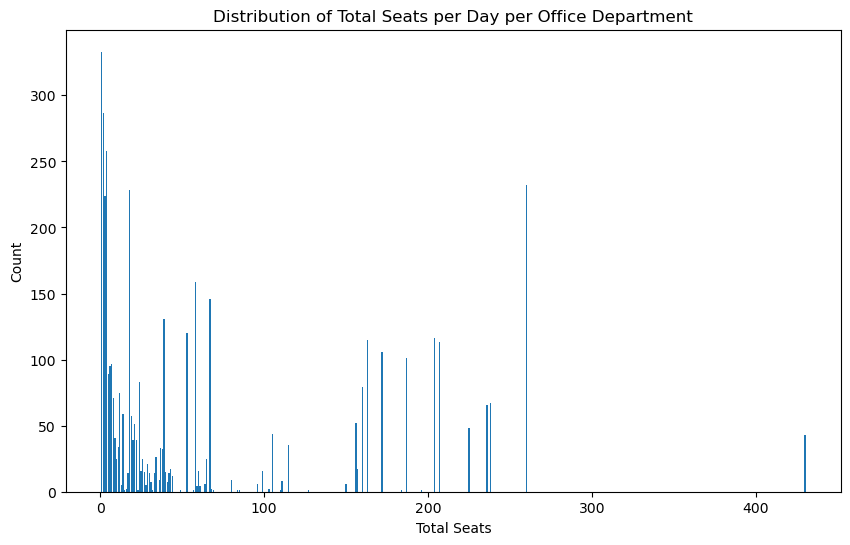

In [38]:
# Create a bar plot of the sorted value counts
plt.figure(figsize=(10, 6))
plt.bar(ttl_st_v_cts.index, ttl_st_v_cts.values)
plt.xlabel('Total Seats')
plt.ylabel('Count')
plt.title('Distribution of Total Seats per Day per Office Department')
plt.show()

###### As you can see, most of the time available bookings are tight, but there are a few times when seat vacancies are high.

###### 3. What is the proportion of the remaining seats in each office to the total seats per day?

To answer this question, I need to match the offices/department and the number of available seats in data_O and data_B with the total number of remaining seats.

In data_O, the Department division is more detailed (divided into first-level and second-level classifications), but data_B only has the first-level classification of departments. Therefore, the Department in data_O could be simplified for subsequent analysis.

In [39]:
# Rename the 'Department (First level + Second level)' column to 'Department'
data_O.rename(columns={'Department (First level + Second level)': 'Department'}, inplace=True)

# Split the 'Department' column on the '.' character and keep only the first part (%First level)
data_O['Department'] = data_O['Department'].str.split('.').str[0]

print(data_O)

       Office Department  Available seats
0    SCO33334         CC               85
2    SCO33334         CC               99
4    SCO33334         PR               13
5    SCO33334         PR                1
6    SCO33334        PAS                1
..        ...        ...              ...
754  SCO33334        HRO                1
755  SCO33334         CF                1
756  SCO33334        HRO                3
757  SCO85883         NW                1
758  IRE84794        HRO                1

[452 rows x 3 columns]


Then, add the Available seats in data_O to data_B based on the matching of Department and Office information.

In [40]:
# Check if the values in the 'Available seats' column are strings, and if so, convert them to integers
data_O['Available seats'] = data_O['Available seats'].apply(lambda x: int(x) if isinstance(x, str) else x)

# Find common items in the 'Office' column of min_seats_per_office_date and data_O
common_office = min_seats_per_office_date['Office'].isin(data_O['Office'])

# Keep only the rows that have a common 'Office' value
Office_Seats = min_seats_per_office_date[common_office]

# Group data_O by 'department' and 'office', and calculate the sum of 'Available seats' in each group
grouped_data_O = data_O.groupby(['Department', 'Office'])['Available seats'].sum().reset_index()

# Merge Office_Seats with grouped_data_O on 'department' and 'office'
Office_Seats = pd.merge(Office_Seats, grouped_data_O, how='left', on=['Department', 'Office'])

# Fill NaN values with 0 if 'Available seats' column does not exist in Office_Seats
Office_Seats['Available seats'].fillna(0, inplace=True)

# Add a column named 'Ttl/Avail' and calculate the ratio of 'Total seats' to 'Available seats'
Office_Seats['Ttl/Avail'] = Office_Seats['Total seats'] / Office_Seats['Available seats']


print(Office_Seats)

       User ID       Date AW Type Other    Office  Total seats   Country  \
0     FL62LM26 2023-02-06  Office   NaN  ENG38999         61.0   England   
1     D050L2M6 2023-02-07  Office   NaN  ENG38999          2.0   England   
2     FL59T62T 2023-02-08  Office   NaN  ENG38999          1.0   England   
3     FL59T62T 2023-02-09  Office   NaN  ENG38999          1.0   England   
4     D02M77M0 2023-02-10   Other   Cde  ENG38999        204.0   England   
...        ...        ...     ...   ...       ...          ...       ...   
4389  F0M5M796 2023-10-02  Office   NaN  SCO85888         37.0  Scotland   
4390  F0M5M796 2023-10-03  Office   NaN  SCO85888         37.0  Scotland   
4391  D03T62M0 2023-10-04  Office   NaN  SCO85888         37.0  Scotland   
4392  D03T62M0 2023-10-05  Office   NaN  SCO85888         37.0  Scotland   
4393  F0M5M796 2023-10-06  Remote   NaN  SCO85888        115.0  Scotland   

           City Department Day_of_Week  Available seats  Ttl/Avail  
0        London   

Some Available seats have a value of 0 because there is no department named OA/C in data_O. These data were removed because the information was missing and could not be analyzed.

In [41]:
# Clean the strange data
Office_Seats = Office_Seats.loc[Office_Seats['Available seats'] != 0.0]
Office_Seats = Office_Seats.loc[Office_Seats['Available seats'] >= Office_Seats['Total seats']]

print(Office_Seats)

       User ID       Date AW Type Other    Office  Total seats   Country  \
1     D050L2M6 2023-02-07  Office   NaN  ENG38999          2.0   England   
2     FL59T62T 2023-02-08  Office   NaN  ENG38999          1.0   England   
3     FL59T62T 2023-02-09  Office   NaN  ENG38999          1.0   England   
6     FL59T62T 2023-02-14  Office   NaN  ENG38999          1.0   England   
7     F00M2MLM 2023-02-15  Office   NaN  ENG38999          1.0   England   
...        ...        ...     ...   ...       ...          ...       ...   
4351  F0M9T665 2023-09-27  Office   NaN  SCO85888          1.0  Scotland   
4352  F7L03790 2023-09-28  Office   NaN  SCO85888          5.0  Scotland   
4355  F7L03790 2023-10-03  Office   NaN  SCO85888          5.0  Scotland   
4356  F7L03790 2023-10-04  Office   NaN  SCO85888          5.0  Scotland   
4357  F0263M05 2023-10-05  Office   NaN  SCO85888          6.0  Scotland   

           City Department Day_of_Week  Available seats  Ttl/Avail  
1        London   

In [42]:
# Assert the situation is normal
assert not (Office_Seats['Available seats'] == 0.0).any(), "There is a row with 'Available seats' value of 0.0"

assert not (Office_Seats['Available seats'] < Office_Seats['Total seats']).any(), "There are rows where the value of 'Available seats' is less than the value of 'Total seats'"

###### The dataframe of Office_Seats illuatrates the proportion of the remaining seats in each office to the total seats per day.

### Visualizaion

Use Graph to illustrate the relation among Ttl/Avail, Office, and Department.

- Step 1: Identify the metrics
1. Office
2. Department
3. Ttl/Avail 


For analysis purposes, each unique office name will be assigned a unique integer

In [43]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the 'Office' column and transform it
Office_Seats['Office_encoded'] = le.fit_transform(Office_Seats['Office'])

print(Office_Seats)

       User ID       Date AW Type Other    Office  Total seats   Country  \
1     D050L2M6 2023-02-07  Office   NaN  ENG38999          2.0   England   
2     FL59T62T 2023-02-08  Office   NaN  ENG38999          1.0   England   
3     FL59T62T 2023-02-09  Office   NaN  ENG38999          1.0   England   
6     FL59T62T 2023-02-14  Office   NaN  ENG38999          1.0   England   
7     F00M2MLM 2023-02-15  Office   NaN  ENG38999          1.0   England   
...        ...        ...     ...   ...       ...          ...       ...   
4351  F0M9T665 2023-09-27  Office   NaN  SCO85888          1.0  Scotland   
4352  F7L03790 2023-09-28  Office   NaN  SCO85888          5.0  Scotland   
4355  F7L03790 2023-10-03  Office   NaN  SCO85888          5.0  Scotland   
4356  F7L03790 2023-10-04  Office   NaN  SCO85888          5.0  Scotland   
4357  F0263M05 2023-10-05  Office   NaN  SCO85888          6.0  Scotland   

           City Department Day_of_Week  Available seats  Ttl/Avail  \
1        London  

- Step 2: Describe quantitative data
1. mean of Ttl/Avail
2. median of Ttl/Avail
3. minimum of Ttl/Avail
4. maximum of Ttl/Avail

In [44]:
mean_Ttl_Avail = Office_Seats['Ttl/Avail'].agg(['mean']) # mean of Ttl/Avail
median_Ttl_Avail = Office_Seats['Ttl/Avail'].agg(['median']) # median of Ttl/Avail
min_Ttl_Avail = Office_Seats['Ttl/Avail'].agg(['min']) # minimum of Ttl/Avail
max_Ttl_Avail = Office_Seats['Ttl/Avail'].agg(['max']) # maximum of Ttl/Avail

print(mean_Ttl_Avail)
print(median_Ttl_Avail)
print(min_Ttl_Avail)
print(max_Ttl_Avail)

mean    0.315815
Name: Ttl/Avail, dtype: float64
median    0.2
Name: Ttl/Avail, dtype: float64
min    0.001462
Name: Ttl/Avail, dtype: float64
max    1.0
Name: Ttl/Avail, dtype: float64


mean, median, minimum and maximum values for 'Ttl/Avail' for each department and office are 0.315815, 0.2, 0.001462, and 1.0

- Step 3. Correlation analysis

Create a boxplot showing the ratio of "Total seats" to "Available seats" for each department and office

I chose to use histograms because my data is divided into several different groups, and histograms can clearly show distribution and proportional relationships.

In [47]:
# Loading the built-in iris dataset from plotly.express and assigning it to the variable 'office_df'
office_df = px.data.iris()
# Creating a scatter plot using the Office_Seats dataframe.
fig = px.scatter(Office_Seats, x="Office_encoded", y="Ttl/Avail", color="Department")
# Displaying the created scatter plot
fig.show()

Graph Analysis:
- Based on: If the ratio of Total Seats / Available Seats is too large, it means that the supply is greater than the demand; on the contrary, the supply is less than the demand.
- Therefore， points where the ratio is too large or too small represent a mismatch between office space and booking demand.
- However,a ratio that is too small is of greater concern as office space may need to be upgraded to accommodate the increase in demand for office space.

##### Thus, Office Encoded for most departments of Office from 0-7 are facing the mismatch between office space and booking needs

### Hypothesis 2: Some people registering in a certain office prefer a certain type of AW.

###### 1. How many offices are there in each city?

In [48]:
# Create a new column 'Office_First_Three' that contains the first three characters of 'Office'
data_O['country'] = data_O['Office'].str[:3]

# Calculate the types and counts of 'country'
country_counts = data_O['country'].value_counts()

print(country_counts)

SCO    280
ENG     88
IRE     84
Name: country, dtype: int64


###### According to the content in the Data Description and the results of the above code, this company has 280 offices in Edinburgh, 88 offices in London, and 84 offices in Dublin

###### 2. How many people have registered user IDs in offices in different cities?

Create a new data frame. In this frame, use the office, region, and number of users (the number of times each office appears in data_RB is how many people are registered in each office, because the user IDs are not repeated in data_RB), AW type and AW type counts

In [49]:
# Create a new DataFrame data_RB_O
data_RB_O = pd.DataFrame()

# Find the unique values in the 'Office' column
unique_offices = data_O['Office'].unique()

# Convert the unique values to a list
office_list = unique_offices.tolist()

# Add 'Office' column from data_O to data_RB_O
data_RB_O['Office'] = office_list

# Add 'country' column to data_RB_O with the first three characters of 'Office'
data_RB_O['country'] = data_RB_O['Office'].str[:3]

# Calculate the types and counts of 'Office' in data_RB
User_counts = data_RB['Office'].value_counts()

# Add 'Office Counts' column to data_RB_O
data_RB_O = pd.merge(data_RB_O, User_counts, left_on='Office', right_index=True)
data_RB_O.rename(columns={'Office_y': 'User_counts'}, inplace=True)



print(data_RB_O)

      Office  Office_x country  User_counts
0   SCO33334  SCO33334     SCO         1461
1   SCO33336  SCO33336     SCO          620
2   SCO33388  SCO33388     SCO         1296
3   SCO33389  SCO33389     SCO         1269
4   SCO85835  SCO85835     SCO          285
5   SCO85883  SCO85883     SCO         2118
6   SCO85884  SCO85884     SCO          713
7   SCO85888  SCO85888     SCO          284
8   IRE33986  IRE33986     IRE          921
9   IRE84794  IRE84794     IRE          320
10  IRE84759  IRE84759     IRE         1191
11  ENG38999  ENG38999     ENG          813
12  ENG39384  ENG39384     ENG          623
13  ENG39394  ENG39394     ENG          567
14  SCO85399  SCO85399     SCO          161
15  SCO85393  SCO85393     SCO          211
16  SCO85395  SCO85395     SCO          159
17  IRE33985  IRE33985     IRE            1


###### User_counts shows the number of employees registered in the booking system in different offices

###### 3. How many of these people prefer daily AW or Weekly AW?

Add the AW information in data_RB to data_RB_O

In [50]:
# Calculate the types and counts of 'AW Code' in each 'Office' group in data_RB
aw_code_counts = data_RB.groupby('Office')['AW Code'].value_counts().reset_index(name='AW Code Counts')

# Add 'AW Code Counts' column to data_RB_O
data_RB_O_AW = pd.merge(data_RB_O, aw_code_counts, on='Office')

print(data_RB_O_AW)

      Office  Office_x country  User_counts       AW Code  AW Code Counts
0   SCO33334  SCO33334     SCO         1461   Daily Agile            1391
1   SCO33334  SCO33334     SCO         1461  Weekly Agile               8
2   SCO33334  SCO33334     SCO         1461      No Agile               5
3   SCO33334  SCO33334     SCO         1461   Full Remote               1
4   SCO33336  SCO33336     SCO          620   Daily Agile             514
5   SCO33336  SCO33336     SCO          620      No Agile              20
6   SCO33336  SCO33336     SCO          620   Full Remote               2
7   SCO33336  SCO33336     SCO          620  Weekly Agile               2
8   SCO33388  SCO33388     SCO         1296   Daily Agile             879
9   SCO33388  SCO33388     SCO         1296  Weekly Agile             378
10  SCO33388  SCO33388     SCO         1296      No Agile              22
11  SCO33388  SCO33388     SCO         1296   Full Remote               2
12  SCO33389  SCO33389     SCO        

###### How many people like Daily AW or Weekly AW has been tallied

### Visualizaion

I chose to use histograms because my data is divided into several different groups, and histograms can clearly show distribution and proportional relationships.

Since a new data frame data_RB_O_AW has been created, the structure and information of this data frame can be displayed using bar charts and box plots.

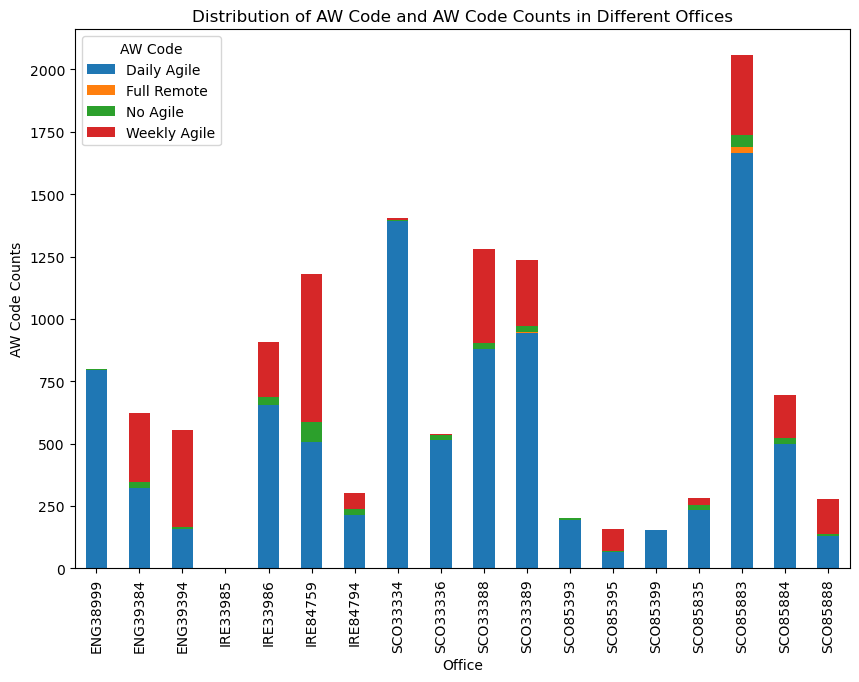

In [51]:
# Pivot the data to get 'AW Code Counts' for each 'AW Code' in each 'Office'
pivot_df = data_RB_O_AW.pivot_table(values='AW Code Counts', index='Office', columns='AW Code', fill_value=0)

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Distribution of AW Code and AW Code Counts in Different Offices')
plt.ylabel('AW Code Counts')
plt.xlabel('Office')

plt.show()

Graph analysis
- In most offices, the most people choose Daily Agile
- The proportion of offices ENG39394 and IRE84759 choosing Daily Agile is larger than that of other offices.
- IRE84759 obviously has more people than other offices who do not choose AW.

###### As you can see from the graph above, it seems that employees in different offices in different regions do have different preferences for flexible work.

### Hypothesis 3: There are more or fewer bookings in certain branch on a certain day-of-week.

###### 1. Which offices have been booked?

Count the office which have been booked.

In [52]:
#Print the Dataframe that has been organised
print(Office_Seats)

# Use the value_counts function to count the number of each unique value in the 'Office' column
office_counts = data_B['Office'].value_counts()

# Print the result
print(office_counts)

       User ID       Date AW Type Other    Office  Total seats   Country  \
1     D050L2M6 2023-02-07  Office   NaN  ENG38999          2.0   England   
2     FL59T62T 2023-02-08  Office   NaN  ENG38999          1.0   England   
3     FL59T62T 2023-02-09  Office   NaN  ENG38999          1.0   England   
6     FL59T62T 2023-02-14  Office   NaN  ENG38999          1.0   England   
7     F00M2MLM 2023-02-15  Office   NaN  ENG38999          1.0   England   
...        ...        ...     ...   ...       ...          ...       ...   
4351  F0M9T665 2023-09-27  Office   NaN  SCO85888          1.0  Scotland   
4352  F7L03790 2023-09-28  Office   NaN  SCO85888          5.0  Scotland   
4355  F7L03790 2023-10-03  Office   NaN  SCO85888          5.0  Scotland   
4356  F7L03790 2023-10-04  Office   NaN  SCO85888          5.0  Scotland   
4357  F0263M05 2023-10-05  Office   NaN  SCO85888          6.0  Scotland   

           City Department Day_of_Week  Available seats  Ttl/Avail  \
1        London  

###### It can be seen that not all offices are booked, but the analysis of office bookings only needs to be based on offices that have been booked.

###### 2. On what days of the week are these offices booked? what is the order of the number of bookings from Monday to Friday?

In [53]:
# Use the value_counts function to count the number of each unique value in the 'Day_of_Week' column
day_counts = data_B['Day_of_Week'].value_counts()

# Print the result
print(day_counts)

Friday       40481
Thursday     40149
Wednesday    39987
Tuesday      39740
Monday       39364
Name: Day_of_Week, dtype: int64


###### The office will be booked from Monday to Friday, and the total number of office bookings will increase starting from Monday.

### Visualization

I chose the heat map because I can express the size of the booking rate with different color depths, which is more conducive to observation and drawing conclusions.

/tmp/ipykernel_139/998133084.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



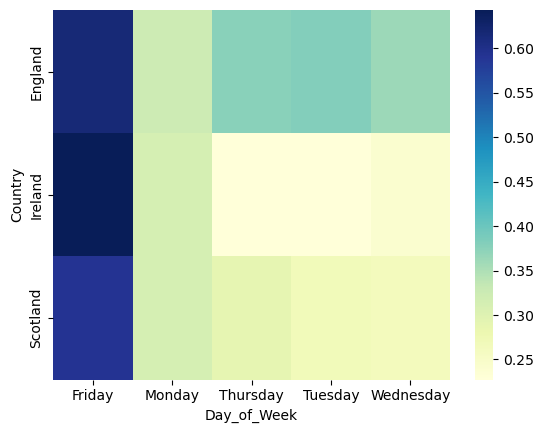

In [54]:
# Calculate the average of "Ttl/Avail" for each office on each day of the week
average_ratio = Office_Seats.groupby(['Country', 'Day_of_Week'])['Ttl/Avail'].mean()

# Pivot the data to get the average "Ttl/Avail" for each office on each day of the week
pivot_oc = average_ratio.reset_index().pivot('Country', 'Day_of_Week', 'Ttl/Avail')

# Create a heatmap to show the distribution and trend of the data
sns.heatmap(pivot_oc, cmap='YlGnBu')
plt.show()

Graph analysis
- Fewer people than usual reserved office seats on Friday
- There is not much difference in booking rates among the three branches on Thursday
- There are differences in booking rates among the three branches on Wednesday, Wednesday and Friday
- It seems that the London office is the most fully booked and the Dublin office is the least booked.

As I have already defined in Assumption 1, Ttl/Avail is the ratio of the remaining available seats to the total available seats for each day, and a larger ratio means that fewer people booked on that day than usual, and it also means that the supply of seats on that day exceeds the demand for seats more than it should. 

###### This heat map seems to validate that the BOOKING situation is indeed less than usual on a given day, and that this varies from branch to branch.

Because the tabular information needed to test hypothesis three has already been sorted out when exploring hypothesis one. Therefore, I plan to use the reorganized data_B to explore the correlation between office reservations and time to verify hypothesis three.

# Summary and Reflection

### Summary

I have analysed the data from the office booking system of a real estate company with the aim of understanding the data types and identifying potential problems from the office perspective. I first conducted an exploratory analysis of the data to understand the basics of the data, such as the amount of data, missing values, data types, and data distribution. Then, I came up with three hypotheses, which are:

- Hypothesis 1: There is a mismatch between office space and booking needs.
- Hypothesis 2: Some people registered in a particular office prefer a certain type of AW.
- Hypothesis 3: There will be more or less bookings at a particular branch on a particular day of the week.
To test these hypotheses, I broke them down into multiple sub-questions and used a number of methods for identifying metrics, describing qualitative data and correlation analysis. For example, to test Hypothesis 1, I calculated the space utilisation for each office as the number of seats remaining divided by the total number of available seats, and then used a scatter plot to show the distribution of space utilisation across departments and offices.

By analysing the data, I obtained some conclusions such as:

- Conclusion 1: There is a mismatch between office space and booking demand, with some offices underutilised and others overutilised, which can lead to wasted resources or booking difficulties.
- Conclusion 2: Some people registered in a particular office prefer a certain type of AW, which may reflect their work habits or preferences, or may be related to the office environment or facilities.
- Conclusion 3: In a particular branch, there are more or less bookings on certain days of the week, which may be related to the characteristics of the branch's business or the staff's work schedules, or may be related to holidays or other factors.


### Reflection

I learnt a lot of knowledge and skills during this data analysis process such as:

- Learned how to use tools such as Python and Pandas for data processing and analysis, such as reading data, cleaning data, filtering data, grouping data, calculating metrics, and drawing charts.
- Learned how to conduct hypothesis and hypothesis testing, and how to interpret and present test results.
- Learned how to ask and validate meaningful questions from an office perspective, and how to identify and summarise potential problems and recommendations from data.

At the same time, I also identified some deficiencies and areas for improvement, such as:

- Deficiency 1: During the process of data analysis, I did not consider some factors that may affect the data, such as holidays, weather, epidemics, etc., which may lead to deviations or anomalies in the data.
- Deficiency 2: During the process of data analysis, I did not dig deeper and analyse the data, such as using machine learning methods such as clustering, classification, regression, etc., to discover hidden patterns or patterns in the data.
- Deficiency 3: During the process of data analysis, I did not perform richer visualisation and presentation of the data, such as using interactive charts, animations, dashboards, etc., to enhance the presentation and attractiveness of the data.